# Homework #3: Simulation and Probability Distributions

Cassidy Cao (cjc379), Bjorn Kvaale (bek67)

This notebook contains solutions for ORIE 4580 Homework #3. The problems focus on simulation techniques, probability distributions, and statistical analysis. The workflow includes:

- Implementing and analyzing Monte Carlo simulations for cost estimation.
- Using inverse transform and acceptance-rejection methods to generate random variables from custom distributions.
- Visualizing results with histograms and overlaying theoretical probability density functions.
- Calculating confidence intervals to assess simulation accuracy.

Each section is clearly labeled and includes code, results, and explanations to support the analysis.

**Import packages:**

In [1]:
import numpy as np
import scipy as sc
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("white")
sns.set_context("talk",font_scale=1.5, rc={"lines.linewidth": 2.5})

import math #to use math.sqrt, math.pi

from rng.mrg32k3a import MRG32k3a

### Question #1

#### Part A:

In [248]:
rng=MRG32k3a()

In [271]:
def simulation(sims):
    costs_X=[]
    costs_Y=[]
    for i in range(sims):
        exp_list= []
        n=6
        lam=0.1
        for j in range(n):
            value= rng.uniform(0,1)
            exp= (math.log(value)*(-1/lam))
            exp_list.append(exp)
        work_hours= sum(exp_list)
        airless_paint_unit_hours_X = 45
        if work_hours >45:
            _cost_X = 60*(work_hours-airless_paint_unit_hours_X) +1000
            costs_X.append(_cost_X)
        else:
            costs_X.append(1000)
        airless_paint_unit_hours_Y = 90
        if work_hours >90:
            _cost_Y = 60*(work_hours-airless_paint_unit_hours_Y) +2000
            costs_Y.append(_cost_Y)
        else:
            costs_Y.append(2000)
    return costs_X, costs_Y

In [272]:
def get_CI(diff, sims):
    mean_cost = sum(diff)/sims
    
    cost_vars= []
    for i in range(sims):
        var = (diff[i]-mean_cost)**2
        cost_vars.append(var)
    if sims == 1:
        total_cost_variance= 0
    else:
        total_cost_variance= sum(cost_vars)/(sims-1)
    half_width = 1.96*(total_cost_variance**(.5))/(sims**(.5))
    lower = round(mean_cost-half_width, 3)
    upper = round(mean_cost+half_width, 3)
    CI_interval = [lower,upper]
    return CI_interval

In [273]:
rng.start_fixed_s_ss_sss([0,0,0])
X = simulation(1000)[0]
get_CI(X, 1000)

[1985.471, 2134.271]

#### Part B:

In [274]:
rng.start_fixed_s_ss_sss([1,0,0])
Y = simulation(1000)[1]
get_CI(Y, 1000)

[2068.865, 2120.071]

#### Part C:

In [275]:
rng.start_fixed_s_ss_sss([0,0,0])
Part1C_X= simulation(1000)[0]
rng.start_fixed_s_ss_sss([1,0,0])
Part1C_Y= simulation(1000)[1]

Part1C_diff= []
for i in range(1000):
    difference= Part1C_X[i]-Part1C_Y[i]
    Part1C_diff.append(difference)
    
get_CI(Part1C_diff, 1000)

[-112.709, 43.514]

#### Part D:

In [276]:
rng.start_fixed_s_ss_sss([0,0,0])
Part1D_X= simulation(1000)[0]
rng.start_fixed_s_ss_sss([0,0,0])
Part1D_Y= simulation(1000)[1]

Part1D_diff= []
for i in range(1000):
    difference= Part1D_X[i]-Part1D_Y[i]
    Part1D_diff.append(difference)
    
get_CI(Part1D_diff, 1000)

[-98.99, 21.342]

### Question #2

#### Part C:

In [125]:
def inverse_CDF(x):
    e = math.e
    bound = 1-(1/e)
    if x<=bound:
        return math.log(x+(1/e))+1
    else:
        return 1/(e-(e*x))

In [164]:
def Part2_1pdf(x):
    e=math.e
    return e**(x-1)
def Part2_2pdf(x):    
    e=math.e
    return 1/(e*(x**2))

In [161]:
def Part2_cdf(x):
    if x<0:
        return 0
    elif x<=1:
        return ((math.e)**(x-1))-1/math.e
    elif x>1:
        return (1-(1/(math.e*x)))

In [186]:
def inversion_sim(n):
    inversions=[]
    for i in range(n):
        U = np.random.uniform(0.0,1.0)
        x_val = inverse_CDF(U)
        if x_val<6:
            inversions.append(x_val)
    return inversions

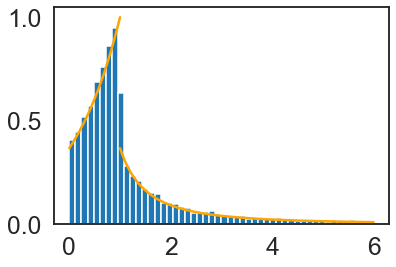

In [189]:
Part2= inversion_sim(10000)
#print(Part2)
maximum= max(Part2)
plt.hist(Part2,bins=50, density=True)

Part2_1X= np.arange(0,1.001,.001)
Part2_2X= np.arange(1.001, 6, 0.001)
Part2_f1X= Part2_1pdf(Part2_1X)
Part2_f2X= Part2_2pdf(Part2_2X)
plt.plot(Part2_1X, Part2_f1X, 'orange')
plt.plot(Part2_2X, Part2_f2X, 'orange')

### Question #3

#### Part D:

In [88]:
def pdf(x):
    return (1/66)*((5*(x**5))+(4*(x**2))+(1))

In [89]:
def accept_or_reject(n, a, b, m): #Need to generate n=10000 points, but we only keep it if V <= (1-U)^2 for the randomly generated (U,V)
    accepted_values=[]
    for i in range(n):
        U_1 = np.random.uniform(0.0, 1.0)
        U_2 = np.random.uniform(0.0, 1.0)
        Z_1 = 2*U_1
        Z_2 = m*U_2
        if Z_2 <= pdf(Z_1):
            accepted_values.append(Z_1)
    return accepted_values

In [90]:
x=accept_or_reject(10000,0,2,11/4)

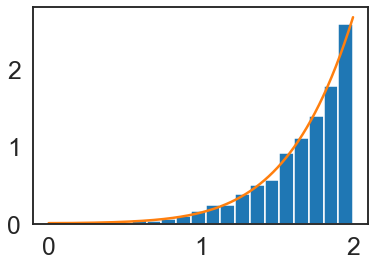

In [105]:
#plot the histogram
plt.hist(x, bins= 20, density=True)
#plot the PDF points
y = np.arange(0, 2, 0.0001)
fy = pdf(y) 
plt.plot(y,fy)